<a href="https://colab.research.google.com/github/TP12345678/Chatbot_Backend/blob/main/Clinical_Biomarkers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# from google.colab import drive
# drive.mount('/content/drive')

In [77]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")

print("Path to dataset files:", path)

# List what files were downloaded
print("Files in dataset folder:")
print(os.listdir(path))

# Load the correct CSV file
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]  # automatically pick the CSV file
df = pd.read_csv(os.path.join(path, csv_file), sep=';')

print("Data loaded successfully!")
print(df.head())

Using Colab cache for faster access to the 'cardiovascular-disease-dataset' dataset.
Path to dataset files: /kaggle/input/cardiovascular-disease-dataset
Files in dataset folder:
['cardio_train.csv']
Data loaded successfully!
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [78]:
#Load dataset
# df = pd.read_csv('CVD_clinical_biomarkers.csv', sep=';')

In [79]:
#Peek at the data (first few rows)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Basic Overview of the Dataset

In [80]:
#Check the shape (rows, columns)
df.shape

(70000, 13)

In [81]:
#Get info about columns, data types, non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Data Preprocessing

In [82]:
#Check for missing/null values
df.isna().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [83]:
#Check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [84]:
# remove id col
df.drop('id', axis=1, inplace=True)

In [85]:
#Get summary stats of numeric columns
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
#Some could be renamed
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [87]:
#Renaming some of the columns for clarity
df = df.rename(columns={
    'ap_hi': 'systolic_bp',
    'ap_lo': 'diastolic_bp',
    'alco': 'alcohol',
    'active': 'physically_active',
    'gluc' : 'glucose',
    'age': 'age_years',
    'height': 'height_m',
    'weight': 'weight_kg',
    'cholesterol': 'cholesterol_level',
    'gluc': 'glucose_level',
    'smoke': 'smoking',
    'cardio': 'cardiovascular_disease'
})

In [88]:
df['age_years'] = (df['age_years'] / 365).astype(int)
df["height_m"] = (df["height_m"]/100).astype(float)
df["BMI"] = (df["weight_kg"]/df["height_m"]**2).round(2).astype(float)
df.head()

,age_years,gender,height_m,weight_kg,systolic_bp,diastolic_bp,cholesterol_level,glucose_level,smoking,alcohol,physically_active,cardiovascular_disease,BMI
0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,21.97
1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,34.93
2,51,1,1.65,64.0,130,70,3,1,0,0,0,1,23.51
3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,28.71
4,47,1,1.56,56.0,100,60,1,1,0,0,0,0,23.01


In [89]:
# Target Attribute balanced
df['cardiovascular_disease'].value_counts()


,count
cardiovascular_disease,
0,35021
1,34979


In [90]:
#Finding the mean age
mean_age = df["age_years"].mean()
print("Mean age in years:", mean_age)

Mean age in years: 52.840671428571426


In [91]:
mean_systolic = df["systolic_bp"].mean() #Normal - 120
mean_diastolic = df["diastolic_bp"].mean() #Normal - 80

print("Mean Systolic BP:", mean_systolic)
print("Mean Diastolic BP:", mean_diastolic)

Mean Systolic BP: 128.8172857142857
Mean Diastolic BP: 96.63041428571428


df.head()

# Exploratory Data Analysis

In [92]:
#Setting styles and size
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

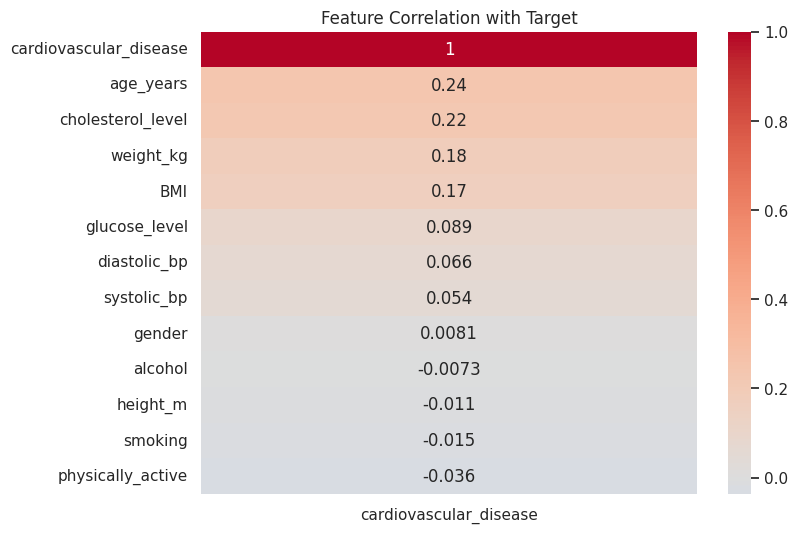

In [93]:
#visualizing numeric correlations with the target
plt.figure(figsize=(8,6))
sns.heatmap(df.corr()[['cardiovascular_disease']].sort_values(by='cardiovascular_disease', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation with Target')
plt.show()


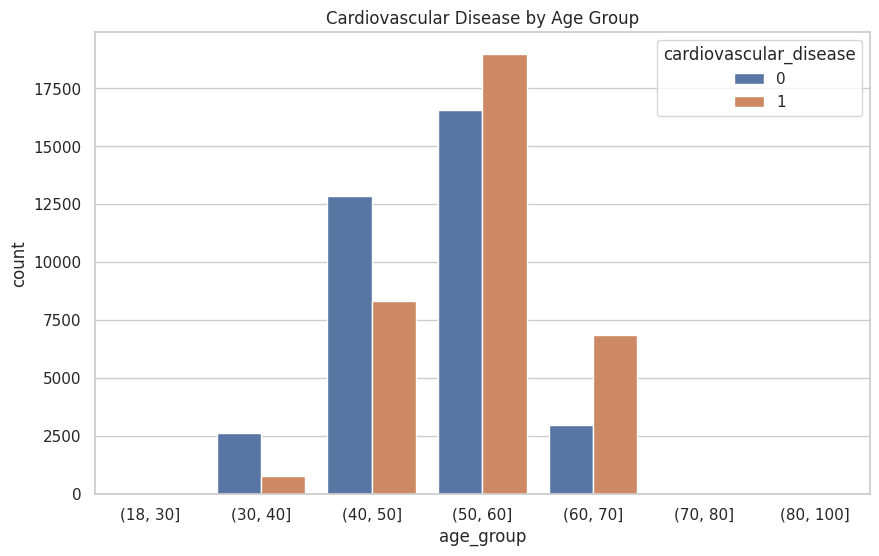

In [94]:
#Age Groups Analysis
#Created age bins to see how risk varies
age_bins = [18, 30, 40, 50, 60, 70, 80, 100]
df['age_group'] = pd.cut(df['age_years'], bins=age_bins)
plt.figure()
sns.countplot(x='age_group', hue='cardiovascular_disease', data=df)
plt.title('Cardiovascular Disease by Age Group')
plt.show()

/tmp/ipython-input-1952942969.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_filtered[df_filtered["cardiovascular_disease"]==0]["systolic_bp"], shade=True, label="No CVD", color="blue")
/tmp/ipython-input-1952942969.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_filtered[df_filtered["cardiovascular_disease"]==1]["systolic_bp"], shade=True, label="CVD", color="red")


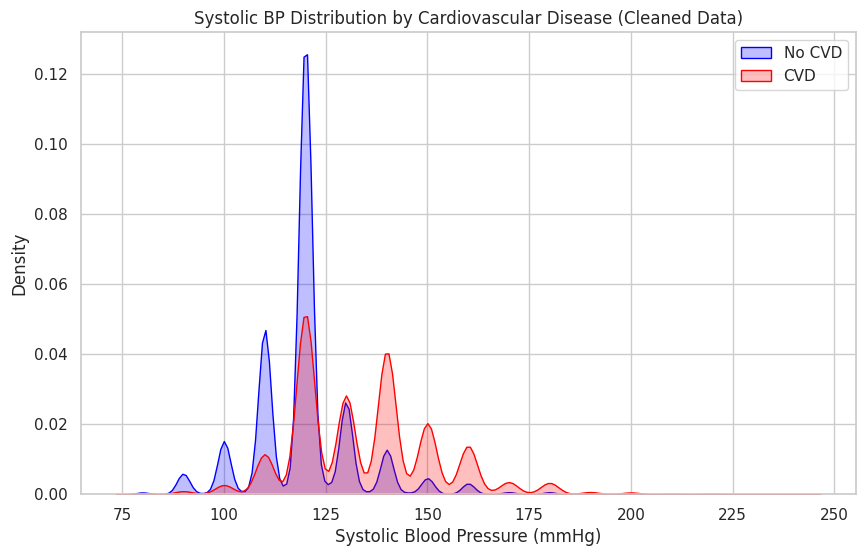

In [95]:
#FINAL
df_filtered = df[(df["systolic_bp"] >= 80) & (df["systolic_bp"] <= 250)]

plt.figure(figsize=(10,6))
sns.kdeplot(df_filtered[df_filtered["cardiovascular_disease"]==0]["systolic_bp"], shade=True, label="No CVD", color="blue")
sns.kdeplot(df_filtered[df_filtered["cardiovascular_disease"]==1]["systolic_bp"], shade=True, label="CVD", color="red")

plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Density")
plt.title("Systolic BP Distribution by Cardiovascular Disease (Cleaned Data)")
plt.legend()
plt.show()

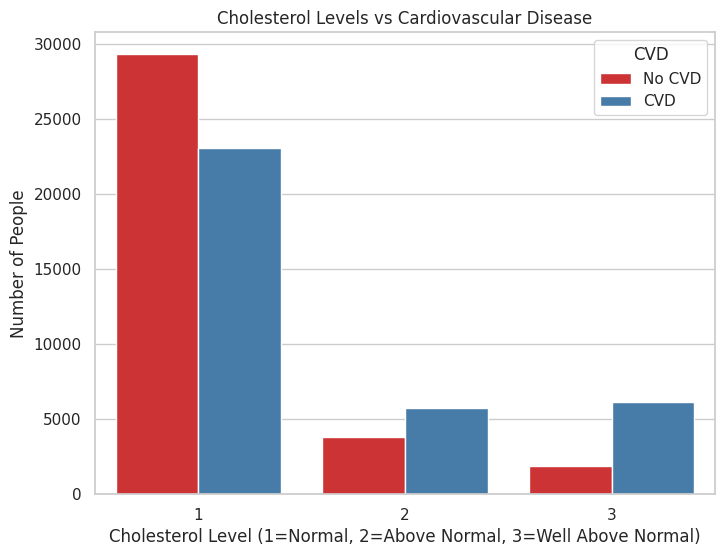

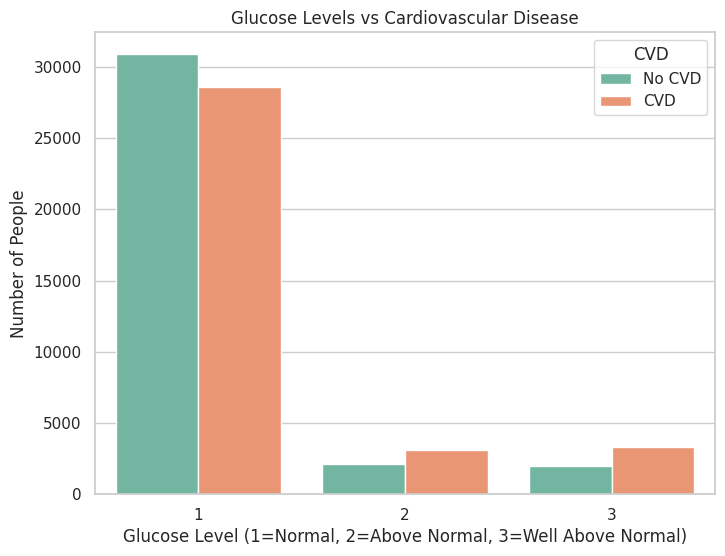

In [96]:
# Cholesterol vs CVD
plt.figure(figsize=(8,6))
sns.countplot(x="cholesterol_level", hue="cardiovascular_disease", data=df, palette="Set1")
plt.xlabel("Cholesterol Level (1=Normal, 2=Above Normal, 3=Well Above Normal)")
plt.ylabel("Number of People")
plt.title("Cholesterol Levels vs Cardiovascular Disease")
plt.legend(title="CVD", labels=["No CVD", "CVD"])
plt.show()

# Glucose vs CVD
plt.figure(figsize=(8,6))
sns.countplot(x="glucose_level", hue="cardiovascular_disease", data=df, palette="Set2")
plt.xlabel("Glucose Level (1=Normal, 2=Above Normal, 3=Well Above Normal)")
plt.ylabel("Number of People")
plt.title("Glucose Levels vs Cardiovascular Disease")
plt.legend(title="CVD", labels=["No CVD", "CVD"])
plt.show()

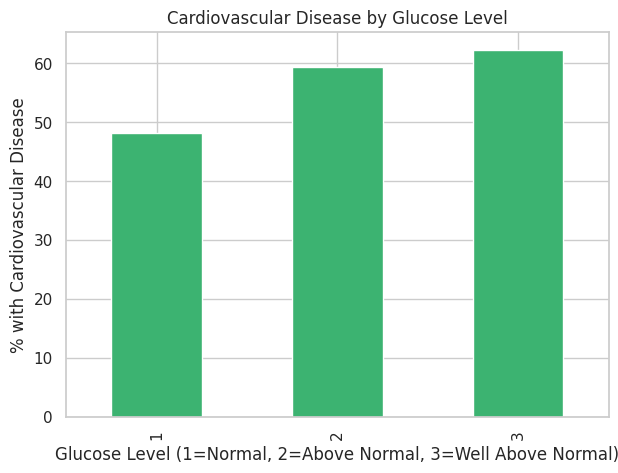

In [97]:
#FINAL
gluc_cvd = df.groupby("glucose_level")["cardiovascular_disease"].mean() * 100
gluc_cvd.plot(kind="bar", color="mediumseagreen", figsize=(7,5))

plt.xlabel("Glucose Level (1=Normal, 2=Above Normal, 3=Well Above Normal)")
plt.ylabel("% with Cardiovascular Disease")
plt.title("Cardiovascular Disease by Glucose Level")
plt.show()

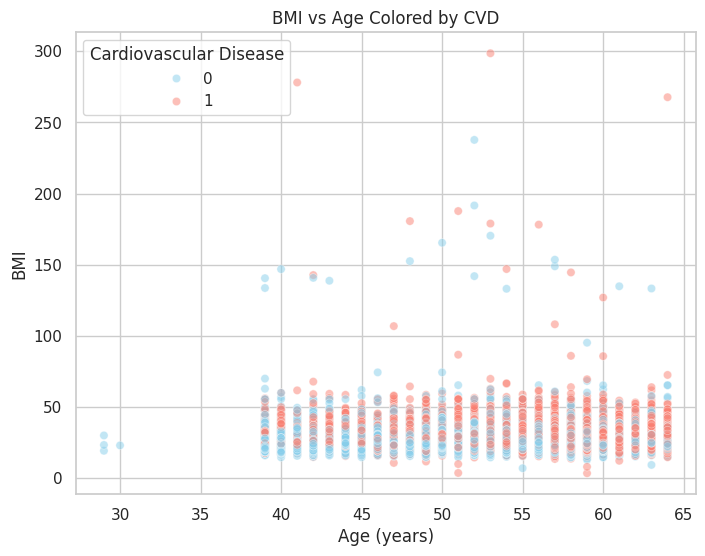

In [98]:
#FINAL
plt.figure(figsize=(8,6))
sns.scatterplot(x="age_years", y="BMI", hue="cardiovascular_disease", data=df,
                alpha=0.5, palette=["skyblue","salmon"])
plt.xlabel("Age (years)")
plt.ylabel("BMI")
plt.title("BMI vs Age Colored by CVD")
plt.legend(title="Cardiovascular Disease")
plt.show()

## Clustering with K-Means Algorithm

In [99]:
# features to cluster on
features = [
    'age_years', 'gender', 'height_m', 'weight_kg',
    'systolic_bp', 'diastolic_bp', 'cholesterol_level',
    'glucose_level', 'smoking', 'alcohol',
    'physically_active', 'BMI'
]
X = df[features]

In [100]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

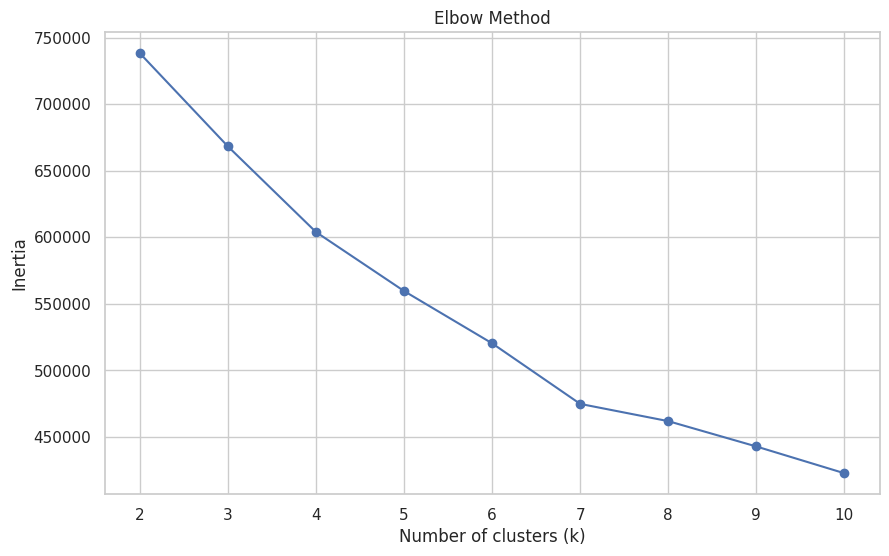

In [101]:
# using elbow method to find optimal k value
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [102]:
# assign clusters
# optimal_k = 2
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# df['cluster'] = kmeans.fit_predict(X_scaled)
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# # Assuming X_scaled is your preprocessed feature matrix
# k_values = range(2, 11)
# silhouette_scores = []

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     cluster_labels = kmeans.fit_predict(X_scaled)
#     score = silhouette_score(X_scaled, cluster_labels)
#     silhouette_scores.append(score)
#     print(f"k = {k}: Silhouette Score = {score:.3f}")



# k = 2: Silhouette Score = 0.196
# k = 3: Silhouette Score = 0.249
# k = 4: Silhouette Score = 0.211
# k = 5: Silhouette Score = 0.203
# k = 6: Silhouette Score = 0.217
# k = 7: Silhouette Score = 0.218
# k = 8: Silhouette Score = 0.224
# k = 9: Silhouette Score = 0.225
# k = 10: Silhouette Score = 0.181

# Silhouette Score for k values from 2 to 10 resulted in low scores,
# meaning that clustering is not a suitable approach for this dataset


## Logistic Regression

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

X = df.drop(columns=['cardiovascular_disease', 'cluster'])  # remove non-feature columns
y = df['cardiovascular_disease']

# Encode categorical features if needed
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


KeyError: "['cluster'] not found in axis"

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## KNN

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Try different k values
k_values = range(1, 21)  # from 1 to 20 neighbors
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 5-fold cross-validation on training data
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the k with the highest accuracy
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k} with CV Accuracy: {cv_scores[np.argmax(cv_scores)]:.3f}")

# Train final model with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

# Evaluate
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nAccuracy:", round(accuracy_score(y_test, y_pred_best), 3))
print("Precision:", round(precision_score(y_test, y_pred_best), 3))
print("Recall:", round(recall_score(y_test, y_pred_best), 3))
print("F1 Score:", round(f1_score(y_test, y_pred_best), 3))


In [ ]:
# k vs cross-validated accuracy

plt.figure(figsize=(8,5))
plt.plot(k_values, cv_scores, marker='o', linestyle='--')
plt.title("KNN: Number of Neighbors vs CV Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


Decision Trees


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=["cardio"])  # features
y = df["cardio"]                 # target label

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# --- Decision Tree Classifier ---
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Train the model
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Predict on test set
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree for Cardiovascular Disease")
plt.show()


In [104]:
for col in df.columns:
    if isinstance(df[col].iloc[0], pd.Interval):
        print(col)


age_group


In [105]:
#getting midpoint of age because its an object.
df['age_group'] = df['age_group'].apply(lambda x: x.mid)

Accuracy: 0.6121428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.84      0.68      6988
           1       0.71      0.38      0.50      7012

    accuracy                           0.61     14000
   macro avg       0.64      0.61      0.59     14000
weighted avg       0.64      0.61      0.59     14000



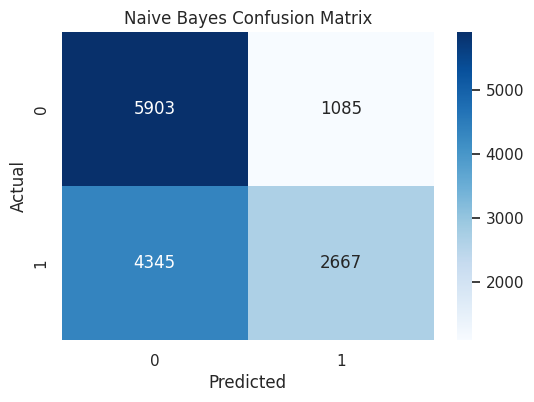

In [106]:
#using gaussian because numeric values
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Feature and Target
X = df.drop(columns=['cardiovascular_disease'])
y = df['cardiovascular_disease']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#initializing
nb_model = GaussianNB()

# training the model
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
